In [1]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


/Users/hytung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
url = 'https://www.hotels.com/Hotel-Search?adults=2&d1=2023-09-29&d2=2023-09-30&destination=London%2C%20England%2C%20United%20Kingdom&endDate=2023-09-30&latLong=51.50746%2C-0.127673&regionId=2114&rooms=1&semdtl=&sort=RECOMMENDED&startDate=2023-09-29&theme=&useRewards=false&userIntent='
response=requests.get(url)
response

<Response [200]>

<!DOCTYPE html>
<html data-language="en_US" dir="ltr" lang="en">
 <head>
  <title>
  </title>
  <meta content="noindex,nofollow" name="robots"/>
  <link href="https://maps.googleapis.com/" rel="preconnect"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="#000000" name="theme-color"/>
  <link href="/favicon.ico" rel="shortcut icon" sizes="16x16 32x32" type="image/x-icon"/>
  <link href="/favicon.ico" rel="icon" sizes="16x16 32x32" type="image/x-icon"/>
  <link href="/favicon.ico" rel="apple-touch-icon"/>
  <link as="script" href="https://c.travel-assets.com/shopping-pwa/l10nBundle/en_US.4b54ebdf6f18a7751588.js" rel="preload"/>
  <link as="script" href="https://c.travel-assets.com/shopping-pwa/core.6b3abc012d694f14a253.js" rel="preload"/>
  <
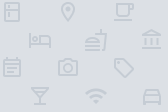
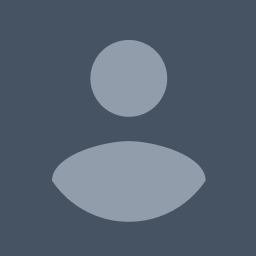

In [3]:
soup= BeautifulSoup(response.content, 'html.parser')

print(soup.prettify())


In [4]:
prices = soup.find_all('div', class_="uitk-text uitk-type-500 uitk-type-medium uitk-text-emphasis-theme")
prices_l = []
for price in prices:
    prices_l.append(price.text)
prices_l = [float(price.replace('$','')) for price in prices_l]
print(prices_l)


[164.0, 146.0, 198.0, 177.0, 209.0]


In [5]:
hotels = soup.find_all('h3', class_="uitk-heading uitk-heading-5 overflow-wrap uitk-layout-grid-item uitk-layout-grid-item-has-row-start")
hotels_l = []
for hotel in hotels:
    hotels_l.append(hotel.text)
print(hotels_l)


['The Belgrave', 'Point A Hotel - London, Canary Wharf', 'Leonardo Royal London Tower Bridge', 'Point A Hotel London Shoreditch', 'The Tower Hotel']


In [6]:
reviews = soup.find_all('div', class_="uitk-text truncate-lines-2 uitk-type-200 uitk-type-regular uitk-text-default-theme")
reviews_l = []
for review in reviews:
    reviews_l.append(review.find('span', class_='is-visually-hidden').text)

reviews_l = [int(review.replace(',', '').split()[0]) for review in reviews_l]
print(reviews_l)

[1000, 1001, 1605, 999, 3275]


In [7]:
ratings = soup.find_all('span', class_="uitk-badge-base-text")
ratings_l = []
for rating in ratings:
    ratings_l.append(float(rating.text))
print(ratings_l)

[9.2, 8.6, 8.4, 8.4, 8.2]


In [8]:
comments = soup.find_all('div', class_="uitk-text truncate-lines-2 uitk-type-300 uitk-type-medium uitk-text-emphasis-theme")
comments_l = []
for comment in comments:
    comments_l.append(comment.find('span', class_='is-visually-hidden').text)
print(comments_l)

['wonderful', 'excellent', 'very good', 'very good', 'very good']


In [9]:
table_data = {
    'Hotel': hotels_l,
    'Price': prices_l,
    'Comment': comments_l,
    'Rating': ratings_l,
    'Review': reviews_l
}

hotel_df = pd.DataFrame(table_data)
hotel_df

,Hotel,Price,Comment,Rating,Review
0,The Belgrave,164.0,wonderful,9.2,1000
1,"Point A Hotel - London, Canary Wharf",146.0,excellent,8.6,1001
2,Leonardo Royal London Tower Bridge,198.0,very good,8.4,1605
3,Point A Hotel London Shoreditch,177.0,very good,8.4,999
4,The Tower Hotel,209.0,very good,8.2,3275


In [10]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Hotel    5 non-null      object 
 1   Price    5 non-null      float64
 2   Comment  5 non-null      object 
 3   Rating   5 non-null      float64
 4   Review   5 non-null      int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 328.0+ bytes


In [11]:
hotel_df.describe()

,Price,Rating,Review
count,5.000000,5.000000,5.000000
mean,178.800000,8.560000,1576.000000
std,25.390943,0.384708,985.237535
min,146.000000,8.200000,999.000000
25%,164.000000,8.400000,1000.000000
50%,177.000000,8.400000,1001.000000
75%,198.000000,8.600000,1605.000000
max,209.000000,9.200000,3275.000000


In [12]:
hotel_df.isnull().sum()

Hotel      0
Price      0
Comment    0
Rating     0
Review     0
dtype: int64

/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


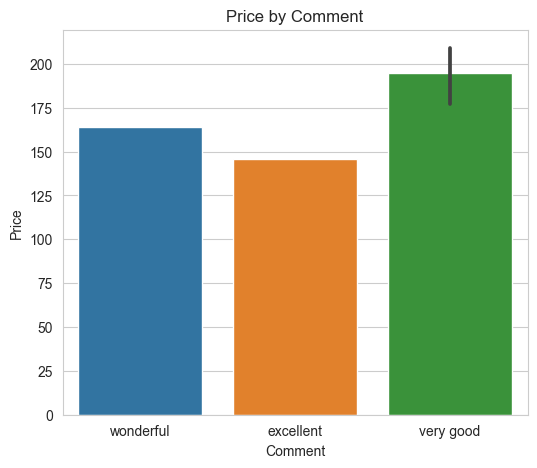

In [44]:
sns.set_style('whitegrid')

plt.figure(figsize=(6,5))
sns.barplot(x='Comment', y='Price', data=hotel_df)
plt.title('Price by Comment')
plt.xlabel('Comment')
plt.ylabel('Price')
plt.show()

/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


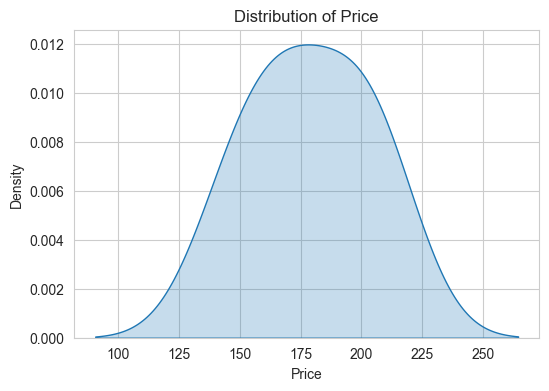

In [46]:
plt.figure(figsize=(6,4))
sns.kdeplot(hotel_df['Price'], fill=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()